In [569]:
#Things to do:
#    -Make charts nicer
#    -Standardise the date axes
#    -Use bar charts for short term charts
#    -Standardise the date axes
#    -Use bar charts for short term charts
#    -Change the chart fonts

In [570]:
#Necessary packages
import pandas as pd
import requests
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import numpy as np
import calendar
import plotly.express as px
import plotly.graph_objects as go

from matplotlib import rc
    #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'serif','serif':['Times']})

matplotlib.rcParams.update({'font.size': 22})

In [571]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# RBA Financial Aggregates - Key Graphs

In [572]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
current_date = now.strftime("%d-%m-%Y")
current_date_and_time = now.strftime("%H:%M:%S %d-%m-%Y")
#print("Graphs updated at " + current_time + " on " + current_date)
print("Graphs and data updated at " + current_time + " on " + current_date)

Graphs and data updated at 21:37:17 on 25-06-2024


In [573]:
# The location
url = 'https://www.rba.gov.au/statistics/tables/xls/d01hist.xlsx'

In [574]:
# Get the file
resp = requests.get(url)

In [575]:
# Open a new file to save down as
output = open('d01.xls', 'wb')
output.write(resp.content)
output.close()

In [576]:
df = pd.read_excel('d01.xls');

In [577]:
# Name the columns after the first row
df.columns = df.iloc[0];
#df.head(3) #Look at the first 15 rows of the data frame

In [578]:
df = df[10:] #Remove the rows of metadata
df.columns = df.columns.str.replace('Title', 'Date') #Rename the date column
#df.head(3)

In [579]:
last_data = df["Date"].iloc[-1]
print("Most recent data is for "+ calendar.month_name[last_data.month] 
      + " " + str(last_data.year))

Most recent data is for April 2024


In [580]:
def graph_series(seriesName, data, startDate, endDate):

    mystring=seriesName

    mystring = mystring.split(';')

    title_string = mystring[0] + ":" + mystring[1] + '<br>' + mystring[2]
    
    layout = dict(
    title=title_string,
    title_x=0.5,
    title_y = 0.9,
    hovermode="x",
    #title_font_family="DIN OT",
    title_font_size=14,
    title_font_color="black",
    yaxis_title="%"
    )
    
    # Create a figure containing a single axes.
    fig = px.bar(data,  x="Date", y=seriesName, width=500, height=400, range_x=[startDate,endDate]) 


    # Get a data range for the date range being used
    mask = (data.loc[:,'Date'] > startDate) & (data.loc[:,'Date'] < endDate)
    values = data[seriesName]
    dataToGraph = values.loc[mask]
    
    y_min = dataToGraph.min() * 1.1
    #print('Minimum value is ' + str(y_min))
    y_max = dataToGraph.max() * 1.1
    #print('Maximum value is ' + str(y_max))
    
    fig.update_yaxes(title=' ')
    fig.update_xaxes(title=' ')
    fig.update_yaxes(range = [y_min, y_max])

    fig.update_layout(layout)
    
    return fig

In [581]:
df_for_table = df

data_series = list(df_for_table)
#print('Here is a list of data series in the table:')
#print(data_series)

df_for_table = df_for_table[-2:]
#print('Here is just the last two rows in the dataframe')
#display(df_for_table)

#df_for_table.loc[:,0] = pd.to_datetime(df_for_table["Date"])

df_for_table  = df_for_table.transpose()
#display(df_for_table)

new_header = df_for_table.iloc[0] #grab the first row for the header
df_for_table = df_for_table[1:] #take the data less the header row
df_for_table.columns = new_header
#display(df_for_table)

# df_for_table = df_for_table.round(decimals = 2)


# datesList = df_for_table.iloc[0].tolist()
# df_for_table.columns = datesList


# df_for_table = df_for_table[1:]


# df_for_table.columns.name = "Series"


df_for_table = df_for_table.drop(['M3; 12-month ended growth', 
                                  'M3; Monthly growth', 
                                  'Credit; Business; Monthly growth', 
                                  'Credit; Business; 12-month ended growth',
                                  'Credit; Total; Monthly growth',
                                  'Credit; Total; 12-month ended growth', 
                                  'Broad money; Monthly growth', 
                                  'Broad money; 12-month ended growth',
                                  'Credit; Business including select financial businesses; Monthly growth', 
                                  'Credit; Business including select financial businesses; 12-month ended growth',
                                  'Credit; Total including select financial businesses; Monthly growth', 
                                  'Credit; Total including select financial businesses; 12-month ended growth'])
#display(df_for_table)


# Change column A's values to floats

df_for_table.index.names = ['']
df_for_table.columns.names = ['']



# df_for_table = df_for_table.round(2)
# df_for_table = df_for_table[:-1]
df_for_table = df_for_table.apply(pd.to_numeric, errors='coerce')
df_for_table = df_for_table.round(decimals = 2)
display(df_for_table)
# print('Up to here')
# display(df_for_table)



,2024-03-31,2024-04-30
,,
Credit; Housing; Monthly growth,0.40,0.45
Credit; Housing; 12-month ended growth,4.34,4.48
Credit; Owner-occupier housing; Monthly growth,0.45,0.47
Credit; Owner-occupier housing; 12-month ended growth,4.98,5.11
Credit; Investor housing; Monthly growth,0.31,0.33
Credit; Investor housing; 12-month ended growth,3.03,3.15
Credit; Other personal; Monthly growth,0.36,0.23
Credit; Other personal; 12-month ended growth,3.09,3.16
Credit; Non-financial Business; Monthly growth,0.60,0.61


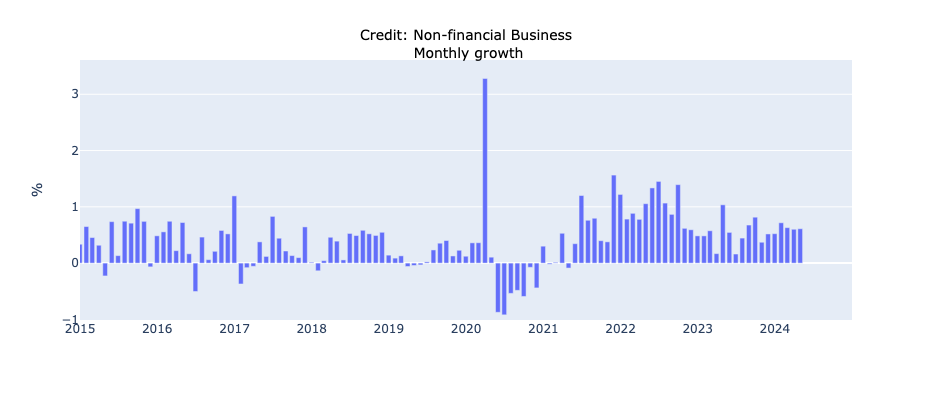

In [582]:
startDateExample = datetime(2015, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Non-financial Business; Monthly growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample)

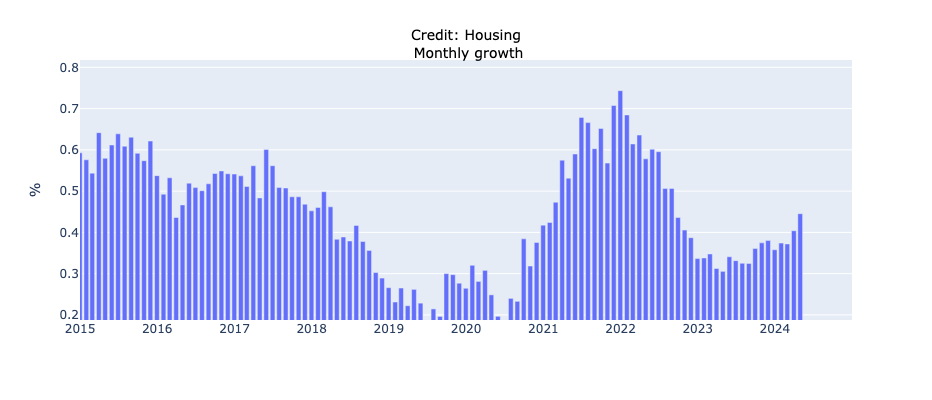

In [583]:
startDateExample = datetime(2015, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Housing; Monthly growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample)





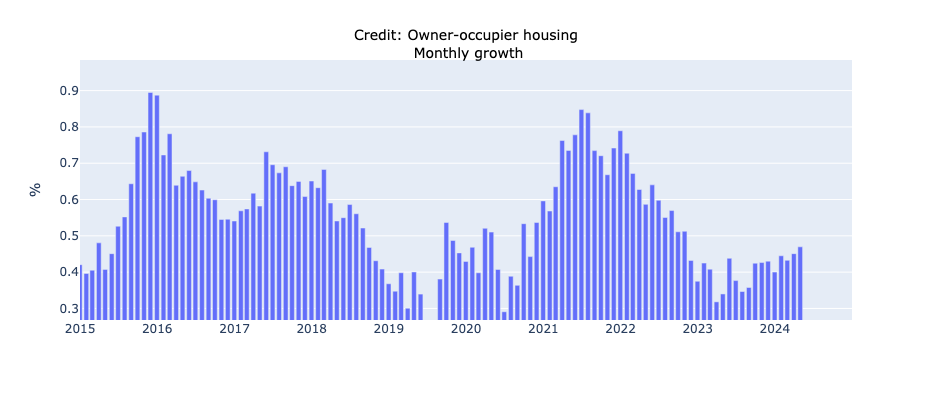

In [584]:
startDateExample = datetime(2015, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Owner-occupier housing; Monthly growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample)

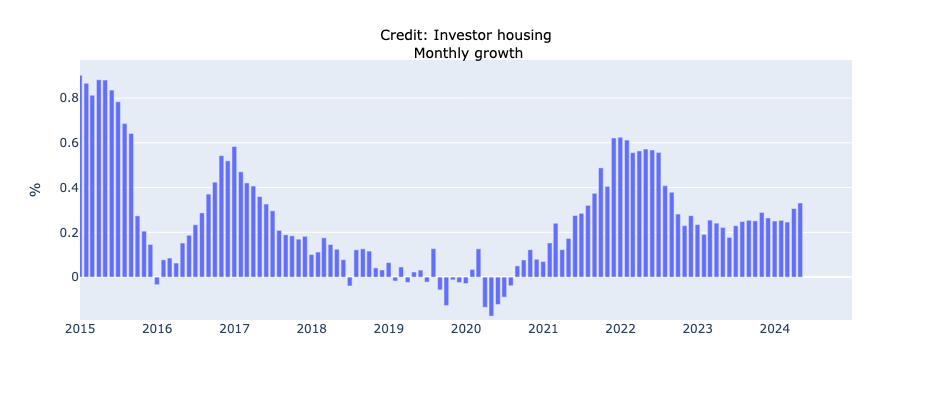

In [585]:
startDateExample = datetime(2015, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Investor housing; Monthly growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample)

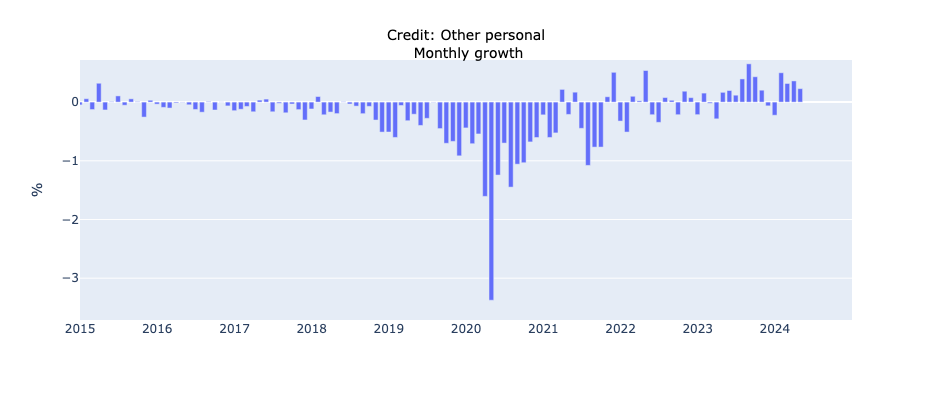

In [586]:
startDateExample = datetime(2015, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Other personal; Monthly growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample)

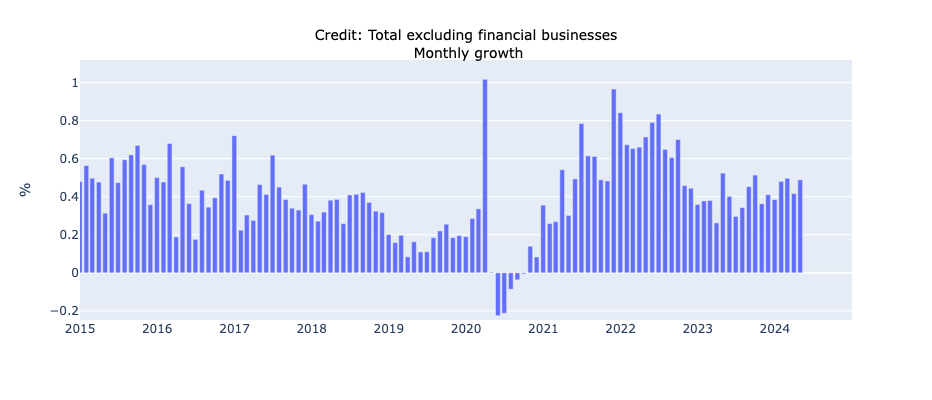

In [587]:
startDateExample = datetime(2015, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Total excluding financial businesses; Monthly growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample)

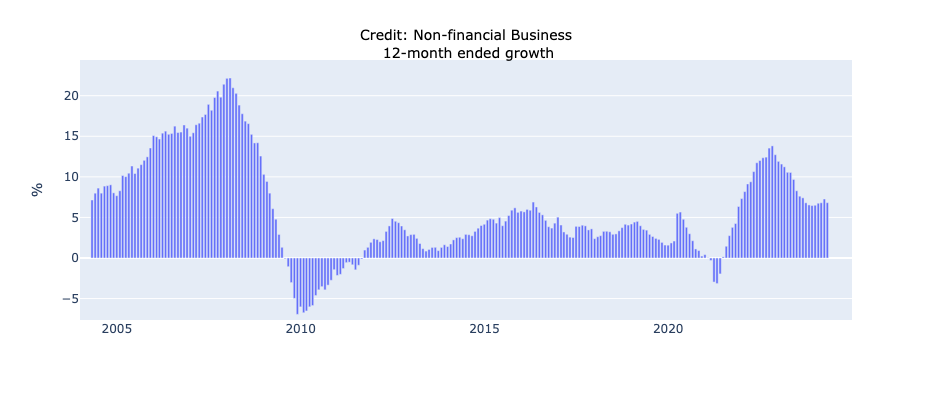

In [588]:
startDateExample = datetime(2004, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Non-financial Business; 12-month ended growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample)

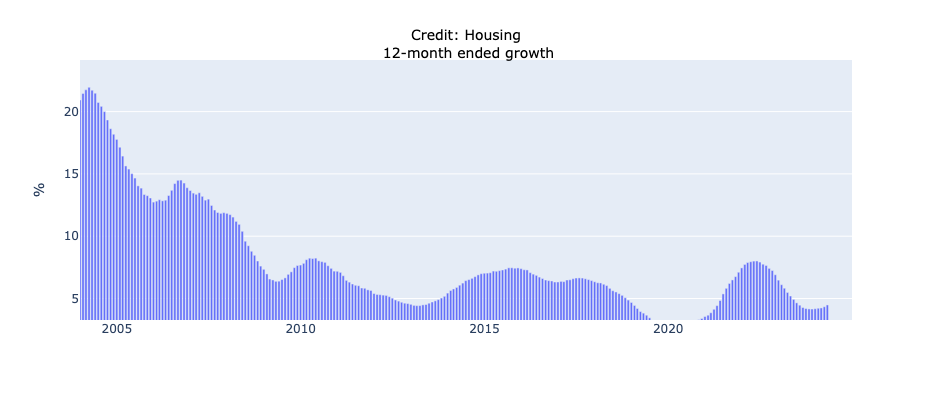

In [589]:
startDateExample = datetime(2004, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Housing; 12-month ended growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample)

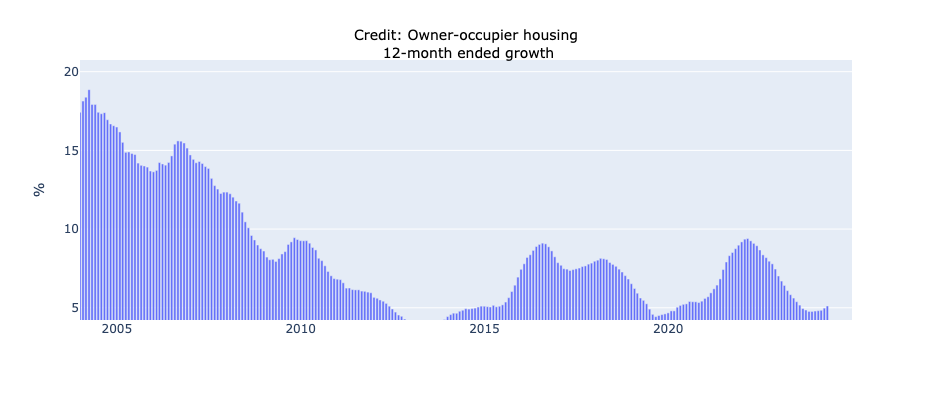

In [590]:
startDateExample = datetime(2004, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Owner-occupier housing; 12-month ended growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample)

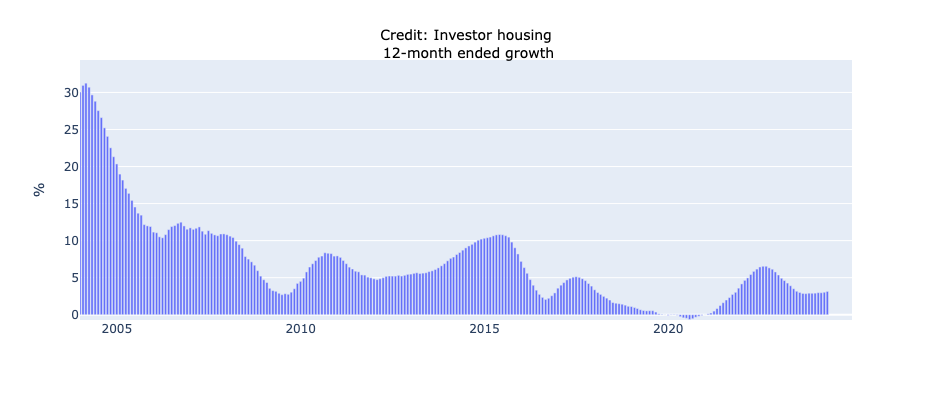

In [591]:
startDateExample = datetime(2004, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Investor housing; 12-month ended growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample)

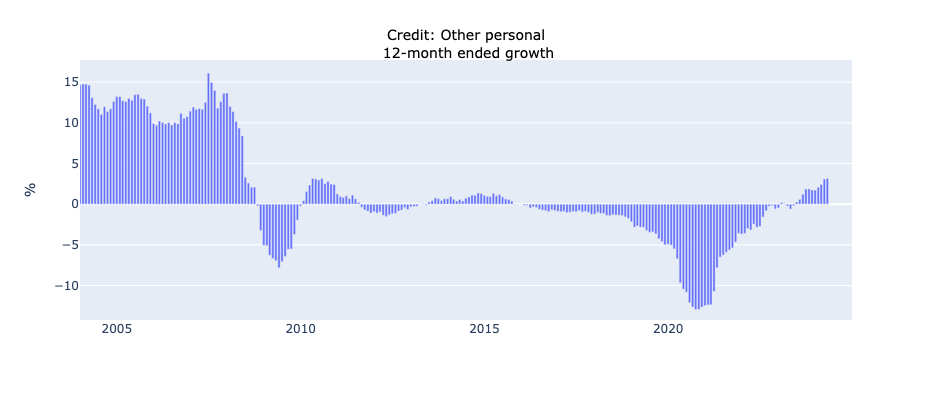

In [592]:
startDateExample = datetime(2004, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Other personal; 12-month ended growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample)

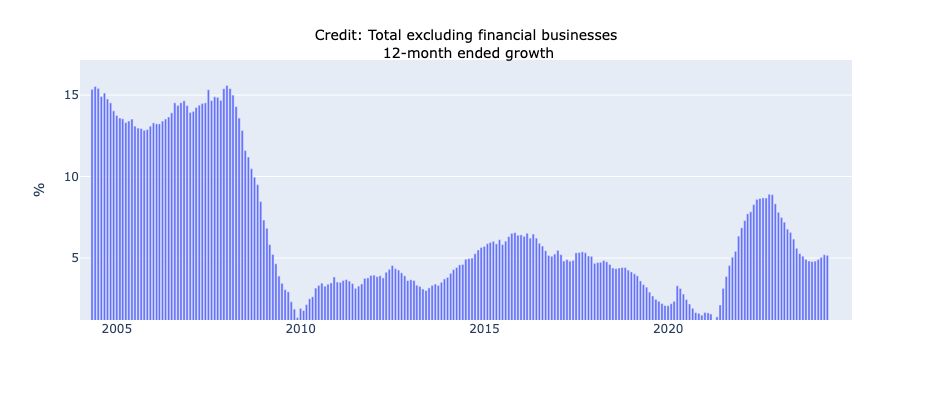

In [593]:
startDateExample = datetime(2004, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'Credit; Total excluding financial businesses; 12-month ended growth'

graph_series(seriesToGraph, df, startDateExample, endDateExample)